# Plot preSource Time

 work with Weakly_2023_44
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/12/28
- update : 2023/12/28


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd
#import pickle

plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy import coordinates

In [3]:
import pandas as pd

In [4]:
def convert_fluxtomag(x) :
    """
    The object and source catalogs store only fluxes. There are hundreds of flux-related columns, 
    and to store them also as magnitudes would be redundant, and a waste of space.
    All flux units are nanojanskys. The AB Magnitudes Wikipedia page provides a concise resource 
    for users unfamiliar with AB magnitudes and jansky fluxes. To convert to AB magnitudes use:
    As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:
    results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
    results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4
    (from DP0 tutorial)
    """
    return -2.50 * np.log10(x) + 31.4

## Config

### Galactic Plane

In [5]:
gal_long = np.linspace(-180.,180,360)
gal_lat = np.zeros((360))

coordinates_galactic_planes = SkyCoord(l=gal_long*u.degree, b=gal_lat*u.degree, frame='galactic')
gp_radec = coordinates_galactic_planes.transform_to('icrs')  

gp_ra_toplot = coordinates.Angle(gp_radec.ra.degree*u.degree)
gp_ra_toplot = gp_ra_toplot.wrap_at(180*u.degree)

### Sources

In [6]:
file = "preSourceTable_202312.csv"

In [7]:
suptitle = "preSources, Auxtel phot 2023"

## Input

In [8]:
df = pd.read_csv(file,index_col=0)

In [9]:
list_of_columns = sorted(list(df.columns))

In [10]:
#for col in list_of_columns:
#    print(col)

## Selection

In [11]:
df.dropna(inplace=True)
selection1 = df["extendedness_flag"] == False
selection2 = df["detect_isPrimary"] == True
df = df[selection1 & selection2 ]

## Magnitudes

In [12]:
df["psfMag"] = df["psfFlux"].map(convert_fluxtomag)
df["gaussianMag"] = df["gaussianFlux"].map(convert_fluxtomag)
df["calibMag"] = df["calibFlux"].map(convert_fluxtomag)

/tmp/ipykernel_39296/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_39296/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4


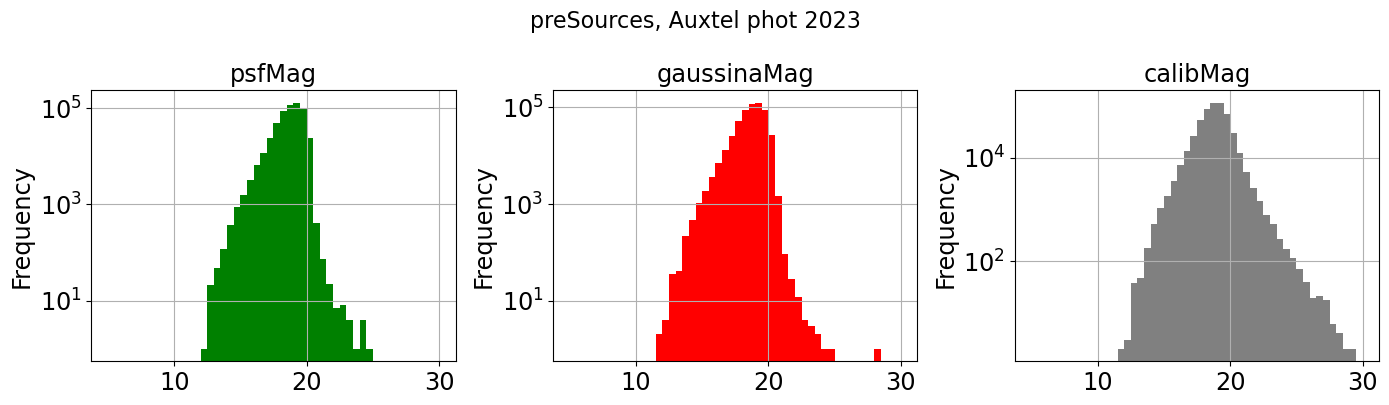

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,4))

df['psfMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="g",logy=True,grid=True,title="psfMag",ax=ax1)
df['gaussianMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="r",logy=True,grid=True,title="gaussinaMag",ax=ax2)
df['calibMag'].plot(kind="hist",bins=50,range=(5,30),facecolor="grey",logy=True,grid=True,title="calibMag",ax=ax3)
plt.suptitle(suptitle,y=1.0,fontsize=16)
plt.tight_layout()


## Convert dateobs into datetime

In [14]:
df["dateobs"]

sourceId
174092471737778180    2023-07-21 01:18:49.927
174092471737778182    2023-07-21 01:18:49.927
174092471737778183    2023-07-21 01:18:49.927
174092471737778184    2023-07-21 01:18:49.927
174092471737778186    2023-07-21 01:18:49.927
                               ...           
176062681684379013    2023-09-15 02:31:54.880
176062681684379014    2023-09-15 02:31:54.880
176062681684379017    2023-09-15 02:31:54.880
176062681684379025    2023-09-15 02:31:54.880
176062681684379026    2023-09-15 02:31:54.880
Name: dateobs, Length: 555022, dtype: object

In [15]:
df["Time"] = pd.to_datetime(df['dateobs'])
#df.plot(x="Time", y=["Total cpu%", "process1 cpu%"])
#plt.show()

In [16]:
df.Time

sourceId
174092471737778180   2023-07-21 01:18:49.927
174092471737778182   2023-07-21 01:18:49.927
174092471737778183   2023-07-21 01:18:49.927
174092471737778184   2023-07-21 01:18:49.927
174092471737778186   2023-07-21 01:18:49.927
                               ...          
176062681684379013   2023-09-15 02:31:54.880
176062681684379014   2023-09-15 02:31:54.880
176062681684379017   2023-09-15 02:31:54.880
176062681684379025   2023-09-15 02:31:54.880
176062681684379026   2023-09-15 02:31:54.880
Name: Time, Length: 555022, dtype: datetime64[ns]

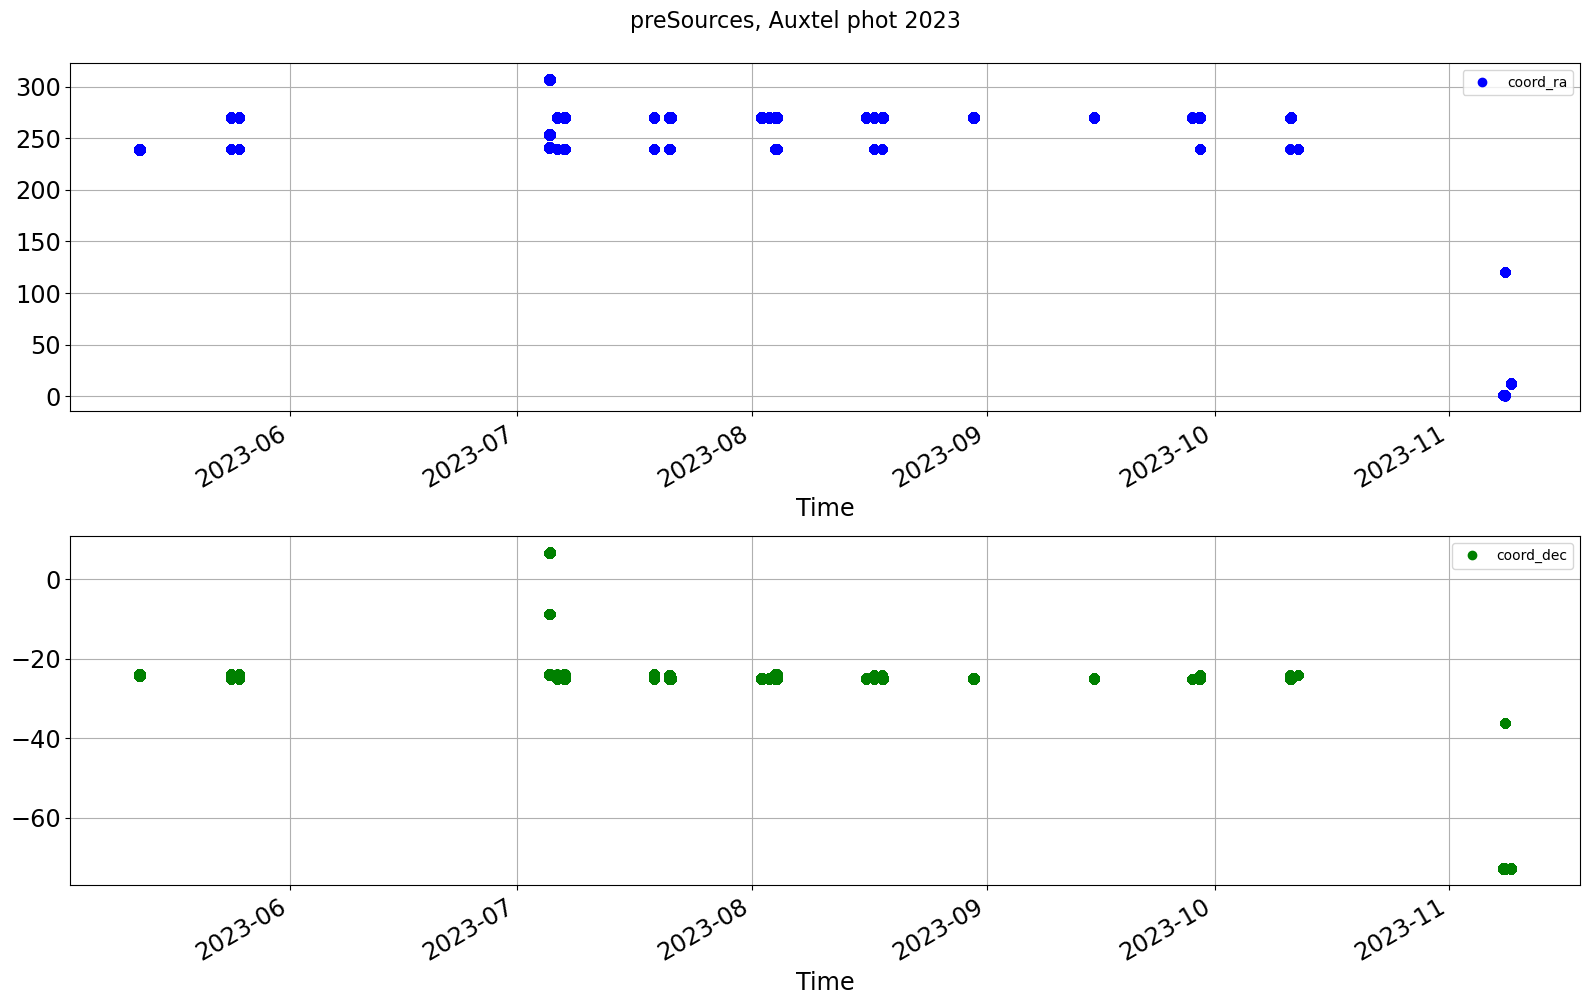

In [17]:
fig,(ax1,ax2) = plt.subplots(2,1)
df.plot(x="Time",y="coord_ra",marker='o',c="b",lw=0.0,ax=ax1,grid=True)
df.plot(x="Time",y="coord_dec",marker='o',c="g",lw=0.0,ax=ax2,grid=True)
plt.suptitle(suptitle,y=1.0,fontsize=16)
plt.tight_layout()

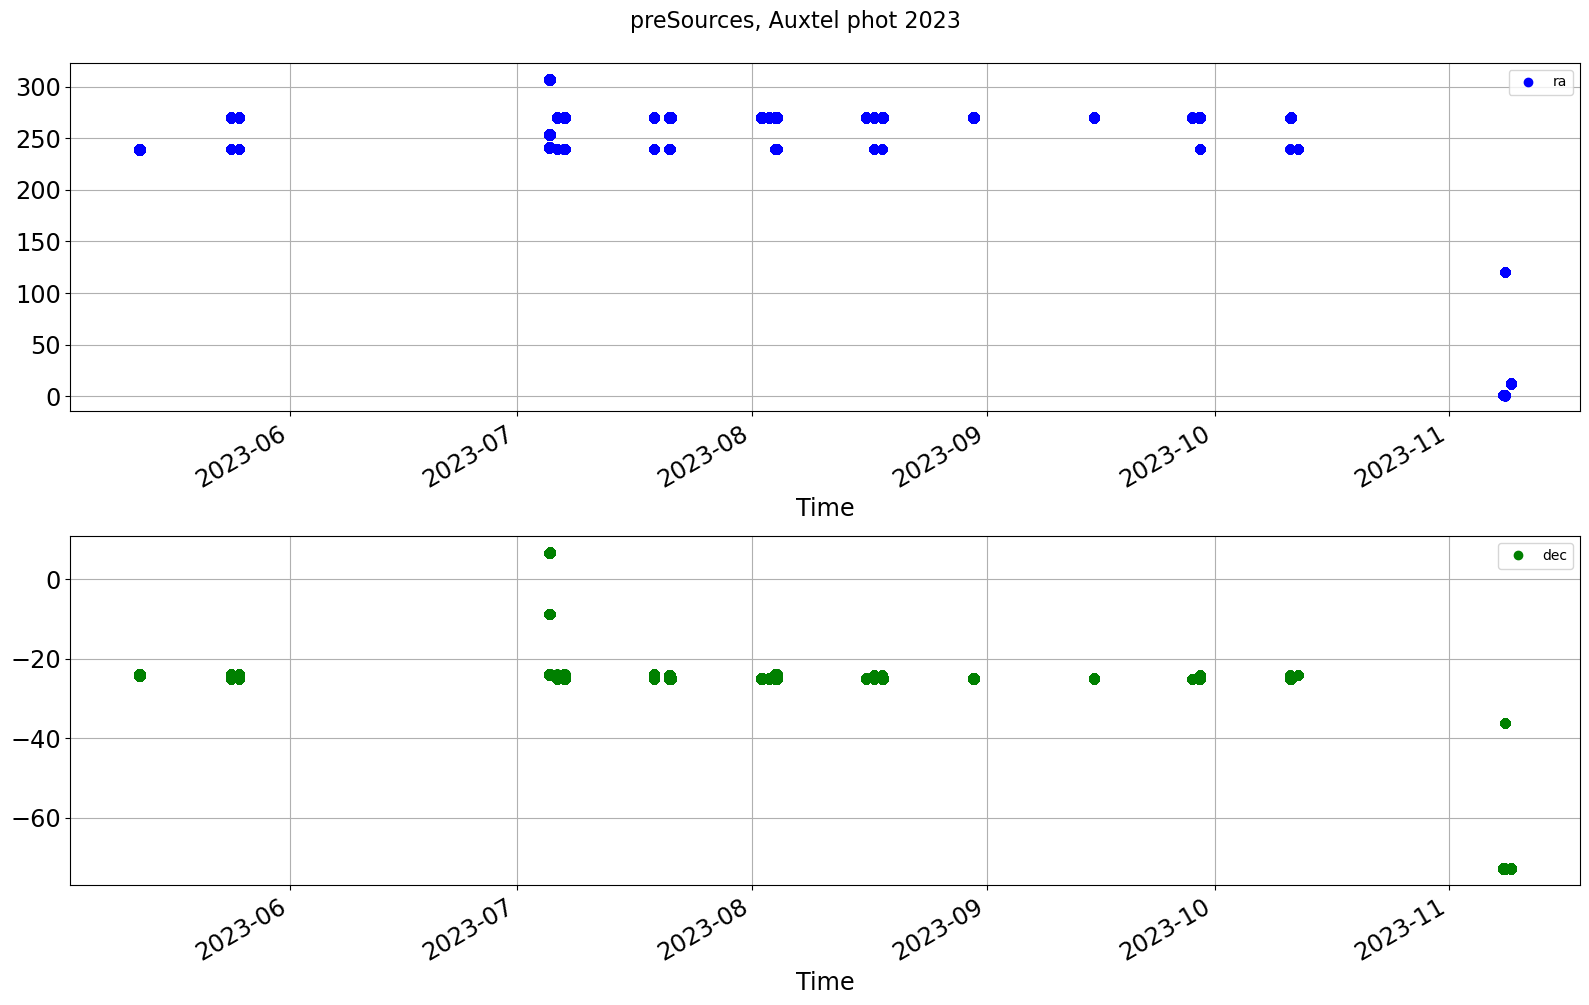

In [18]:
fig,(ax1,ax2) = plt.subplots(2,1)
df.plot(x="Time",y="ra",marker='o',c="b",lw=0.0,ax=ax1,grid=True)
df.plot(x="Time",y="dec",marker='o',c="g",lw=0.0,ax=ax2,grid=True)
plt.suptitle(suptitle,y=1.0,fontsize=16)
plt.tight_layout()

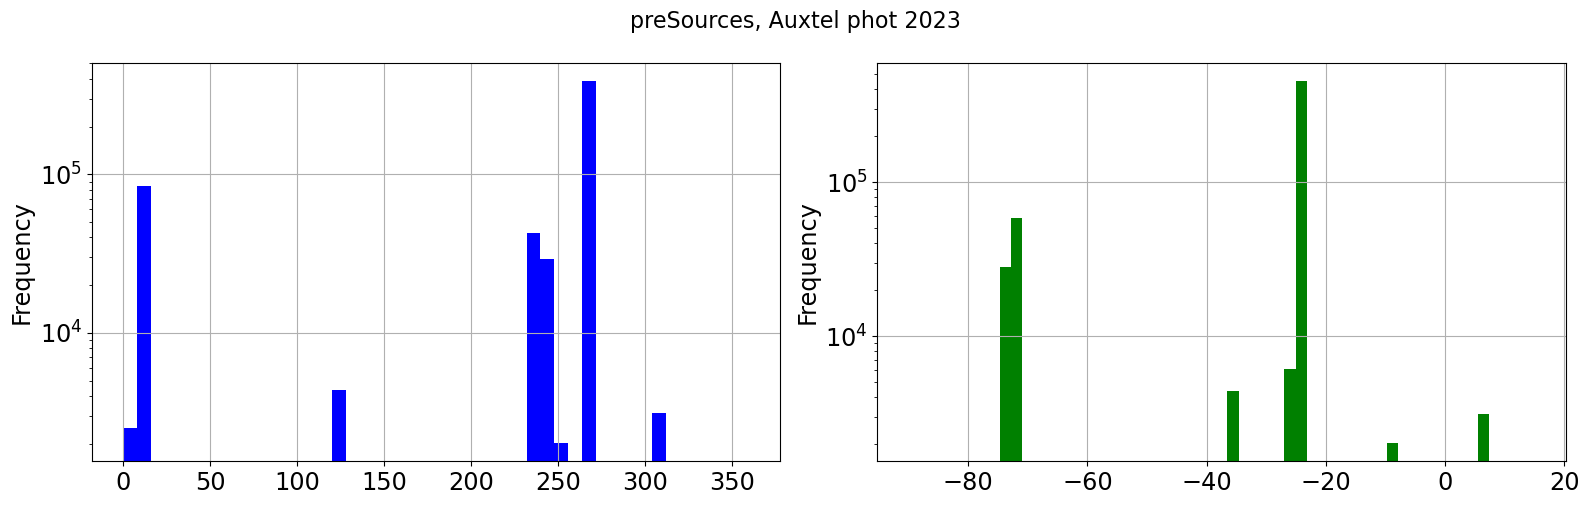

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
df_sel = df["coord_ra"]
df_sel.plot(kind="hist",x="coord_ra",bins=45,range=(0,360),facecolor="b",ax=ax1,grid=True,logy=True)
df_sel = df["coord_dec"]
df_sel.plot(kind="hist",x="coord_dec",bins=55,range=(-90,15),facecolor="g",ax=ax2,grid=True,logy=True)
plt.suptitle(suptitle,y=1.0,fontsize=16)
plt.tight_layout()

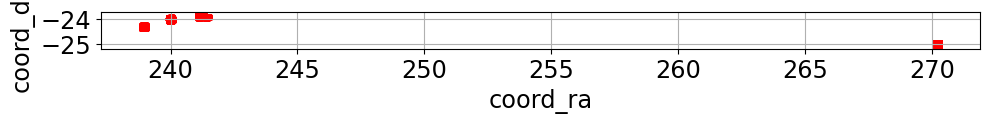

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
cut1 = (df["ra"]> 200.) &  (df["ra"]<300.)
cut2 = (df["dec"]> -30) &  (df["dec"]<-10)
df_sel = df[cut1 & cut2]
df_sel = df_sel[["coord_ra","coord_dec"]]
df_sel.plot(kind="scatter",x="coord_ra",y="coord_dec",marker=".",c="r",ax=ax,grid=True)
plt.gca().set_aspect('equal')
#plt.suptitle(suptitle,fontsize=16)
plt.tight_layout()

## Sky map

In [21]:
ra = coord.Angle(df["coord_ra"].values, unit=u.degree)
dec = coord.Angle(df["coord_dec"].values, unit=u.degree)
#
ra  = ra.wrap_at(180*u.degree).radian
dec = dec.radian
#
df["RA"] = ra
df["DEC"] = dec

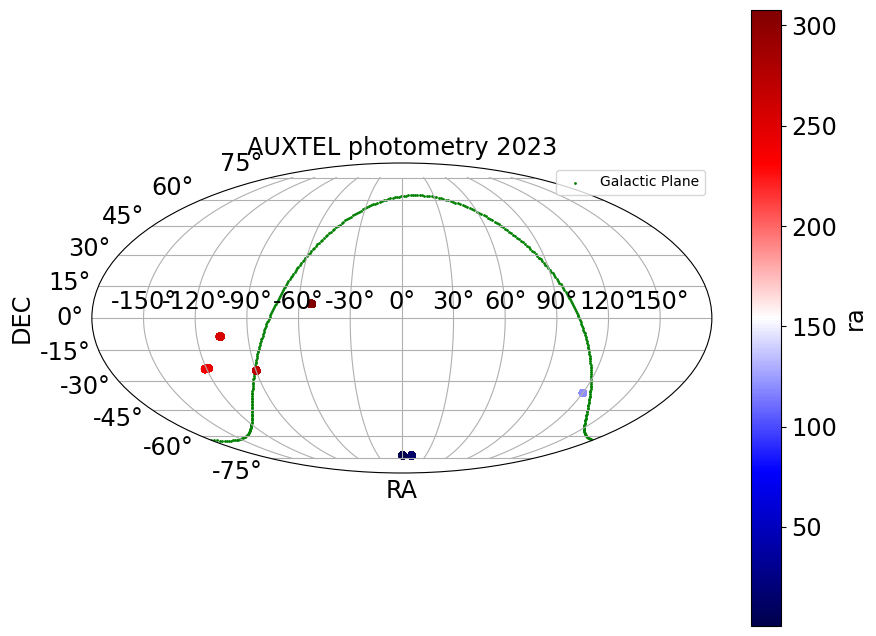

In [22]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection="aitoff")
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(gp_ra_toplot.radian, gp_radec.dec.radian,c="g",label="Galactic Plane",s=1)
df.plot.scatter(x='RA',y='DEC',c='ra',colormap='seismic',grid=True,ax=ax,figsize=(10,8),title='AUXTEL photometry 2023')
ax.legend()

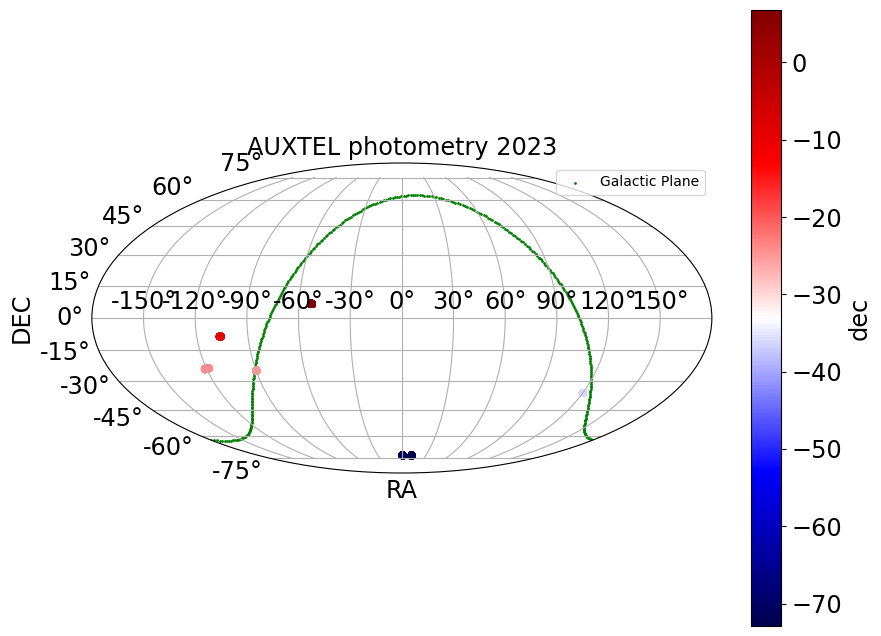

In [23]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection="aitoff")
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(gp_ra_toplot.radian, gp_radec.dec.radian,c="g",label="Galactic Plane",s=1)
df.plot.scatter(x='RA',y='DEC',c='dec',colormap='seismic',grid=True,ax=ax,figsize=(10,8),title='AUXTEL photometry 2023')
ax.legend()

In [24]:
df["RAdeg"] = df["RA"]*180/np.pi
df["DECdeg"] = df["DEC"]*180/np.pi

Text(0.5, 1.0, 'preSources, Auxtel phot 2023')

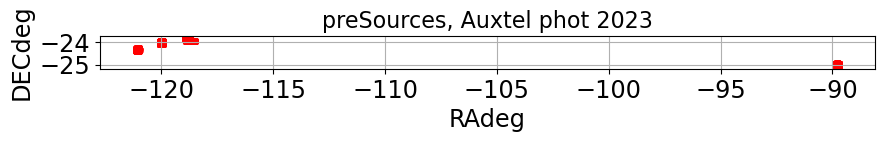

In [25]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
cut1 = (df["ra"]> 200.) &  (df["ra"]<300.)
cut2 = (df["dec"]> -30) &  (df["dec"]<-10)
df_sel = df[cut1 & cut2]
df_sel = df_sel[["RAdeg","DECdeg"]]
df_sel.plot(kind="scatter",x="RAdeg",y="DECdeg",marker=".",c="r",ax=ax,grid=True)
plt.gca().set_aspect('equal')
plt.title(suptitle,fontsize=16)

Text(0.5, 1.0, 'preSources, Auxtel phot 2023')

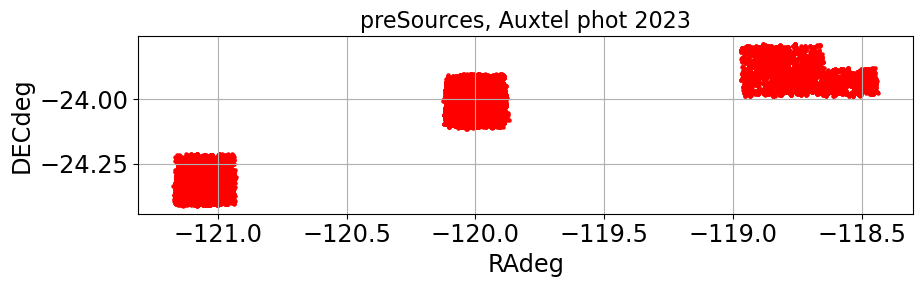

In [26]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
cut1 = (df["RAdeg"]> -130.) &  (df["RAdeg"]<-115.)
cut2 = (df["dec"]> -30) &  (df["dec"]<-10)
df_sel = df[cut1 & cut2]
df_sel = df_sel[["RAdeg","DECdeg"]]
df_sel.plot(kind="scatter",x="RAdeg",y="DECdeg",marker=".",c="r",ax=ax,grid=True)
plt.gca().set_aspect('equal')
plt.title(suptitle,fontsize=16)

Text(0.5, 1.0, 'preSources, Auxtel phot 2023')

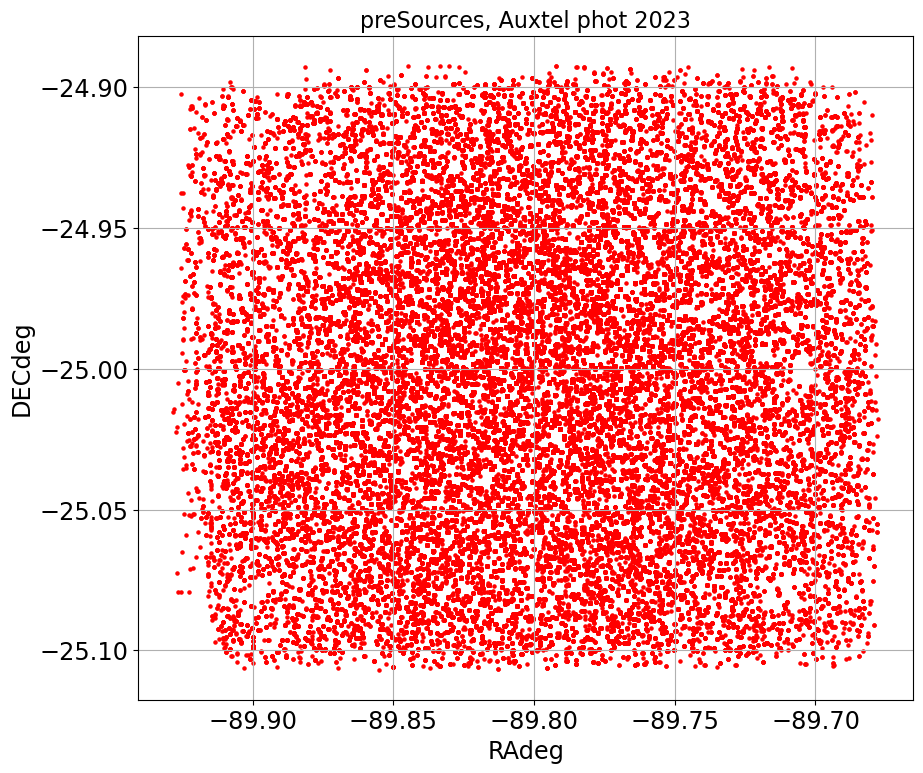

In [28]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
cut1 = (df["RAdeg"]> -95.) &  (df["RAdeg"]<-80.)
cut2 = (df["dec"]> -30) &  (df["dec"]<-10)
df_sel = df[cut1 & cut2]
df_sel = df_sel[["RAdeg","DECdeg"]]
df_sel.plot(kind="scatter",x="RAdeg",y="DECdeg",marker=".",c="r",ax=ax,grid=True)
plt.gca().set_aspect('equal')
plt.title(suptitle,fontsize=16)